In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tools.eval_measures import rmse
import statsmodels.formula.api as smf
from sklearn import preprocessing

# 8. Build a prediction model of your choice (regression or supervised learning) to predict movie ratings (for all 400 movies) from personality factors only. Make sure to use cross-validation methods to avoid overfitting and characterize the accuracy of your model. 

In [2]:
pstable=pd.read_csv("/Users/beckybian/Desktop/NYUstudy/大三下/Intro to DS/Final project/pstable.csv")

In [3]:
pstable

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,Twister (1996),MacArthur (1977),Look Who's Talking (1989),PSPC1,PSPC2,PSPC3,PSPC4,PSPC5,PSPC6,PSPC7
0,NaN,NaN,1.000,NaN,0.750,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.208913,0.297061,-1.828417,0.870151,5.367108,-1.419090,2.538357
1,NaN,NaN,0.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.011374,1.051272,-2.450606,1.157547,1.412102,-1.402022,1.777282
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.213790,0.177162,0.476806,1.305224,-1.319550,0.165010,0.366985
3,NaN,NaN,0.500,NaN,0.750,NaN,NaN,NaN,NaN,1.000,...,NaN,NaN,NaN,-1.701968,-2.852014,-0.393521,0.132534,-1.760632,2.787845,0.412446
4,NaN,NaN,0.875,NaN,0.125,NaN,0.125,0.250,NaN,0.000,...,0.375,NaN,NaN,2.206418,-0.128517,1.827915,0.077354,-1.516327,0.209556,0.504654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,NaN,NaN,0.875,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.187947,-1.616939,-1.160415,-0.795910,-1.152528,0.957226,1.415285
1093,0.75,1.0,NaN,NaN,1.000,1.0,0.625,NaN,0.875,0.875,...,1.000,1.0,1.0,-1.749835,-2.650070,1.769161,0.034544,-0.019625,-5.538726,0.844476
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.875,NaN,NaN,...,NaN,NaN,NaN,-2.192696,-1.519139,-3.074183,-1.457141,-1.382879,0.668877,1.274236
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.939143,-3.561183,-0.978901,2.282479,0.202917,-1.558947,0.255646


In [4]:
'''
because of the large number of missing values as well as the missing value amount difference across table indicates
the number of people rating each movie is very different, it's necessary for us to analyze the data specific to each
movie respectively. Hence, we randomly select Alien(1979) as an example to illustrate our analytical process and similar
method as well as model can be employed to predict rating of any other models as the independent factors are the same
whereas the coefficient of final output may be slightly different due to movie type difference.
'''

"\nbecause of the large number of missing values as well as the missing value amount difference across table indicates\nthe number of people rating each movie is very different, it's necessary for us to analyze the data specific to each\nmovie respectively. Hence, we randomly select Alien(1979) as an example to illustrate our analytical process and similar\nmethod as well as model can be employed to predict rating of any other models as the independent factors are the same\nwhereas the coefficient of final output may be slightly different due to movie type difference.\n"

In [5]:
alien=pstable.drop(pstable.iloc[:,0:3], axis = 1)

In [6]:
alien=alien.drop(alien.iloc[:,1:397], axis = 1)

In [7]:
alien

,Alien (1979),PSPC1,PSPC2,PSPC3,PSPC4,PSPC5,PSPC6,PSPC7
0,NaN,2.208913,0.297061,-1.828417,0.870151,5.367108,-1.419090,2.538357
1,NaN,2.011374,1.051272,-2.450606,1.157547,1.412102,-1.402022,1.777282
2,NaN,0.213790,0.177162,0.476806,1.305224,-1.319550,0.165010,0.366985
3,NaN,-1.701968,-2.852014,-0.393521,0.132534,-1.760632,2.787845,0.412446
4,NaN,2.206418,-0.128517,1.827915,0.077354,-1.516327,0.209556,0.504654
...,...,...,...,...,...,...,...,...
1092,NaN,0.187947,-1.616939,-1.160415,-0.795910,-1.152528,0.957226,1.415285
1093,NaN,-1.749835,-2.650070,1.769161,0.034544,-0.019625,-5.538726,0.844476
1094,NaN,-2.192696,-1.519139,-3.074183,-1.457141,-1.382879,0.668877,1.274236
1095,NaN,-0.939143,-3.561183,-0.978901,2.282479,0.202917,-1.558947,0.255646


In [156]:
# converting to csv
alien.to_csv('/Users/beckybian/Desktop/NYUstudy/大三下/Intro to DS/Final project/alien.csv')

Because the missing values here indicate the people who did not rate this movie whereas the number of missing values in other columns are slightly low compared to the overall sample size, here we decide to drop the missing values from the table directly.

In [8]:
alien_new=alien.dropna()

In [9]:
alien_new.isnull().sum()

Alien (1979)    0
PSPC1           0
PSPC2           0
PSPC3           0
PSPC4           0
PSPC5           0
PSPC6           0
PSPC7           0
dtype: int64

In [10]:
alien_new

,Alien (1979),PSPC1,PSPC2,PSPC3,PSPC4,PSPC5,PSPC6,PSPC7
5,0.625,6.612358,0.270231,-1.556534,1.558881,0.847418,1.594202,2.096101
7,0.625,2.079572,-0.484846,1.881905,0.911348,0.268381,-0.082841,0.850226
9,0.750,-2.825191,0.726470,1.420172,0.605404,2.192692,-1.077891,0.947104
11,0.000,-0.178860,-2.067199,0.289390,3.220487,0.491259,-2.644172,1.659871
22,0.750,2.747157,0.513846,1.368049,-1.514190,1.026301,-0.448838,-1.351362
...,...,...,...,...,...,...,...,...
1078,0.750,1.205302,-0.989109,-1.067884,0.456710,1.230015,0.879927,-0.768297
1084,1.000,-4.993387,-2.255509,0.202449,-3.672309,3.443546,0.194869,0.411560
1085,0.875,3.058707,-1.813413,2.006175,-0.914414,-3.232505,-0.927467,-2.398193
1086,0.625,-1.966435,-0.416310,2.143506,0.767475,-2.508284,-1.184787,-2.489542


null values all dropped

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe7ffdb7d90>],
      dtype=object)

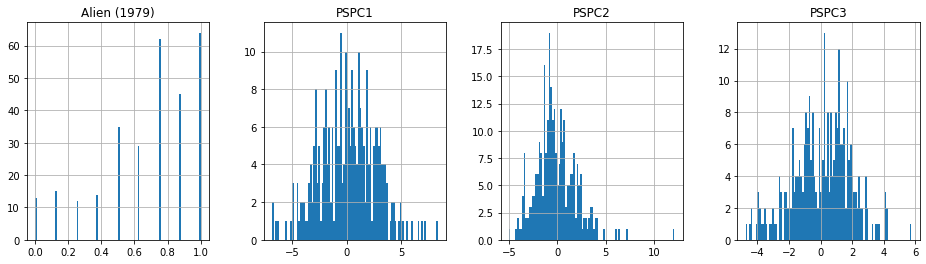

In [11]:
fig, ax = plt.subplots(1, 4, figsize=(16, 4))
# pd.DataFrame.hist(df, column='total_rooms', bins = 100)
# pd.DataFrame.hist(df, column='total_bedrooms', bins = 100)
alien_new.hist(column = alien_new.columns[0], ax=ax[0], bins = 100)
alien_new.hist(column = alien_new.columns[1], ax=ax[1], bins = 100)
alien_new.hist(column = alien_new.columns[2], ax=ax[2], bins = 100)
alien_new.hist(column = alien_new.columns[3], ax=ax[3], bins = 100)

we found that because almost all the data are within the range of 1-5 and 0-4, there's no necessity to normalize or standardize them without skewed pattern. In addition, there's also no outliers to deal with, which means that the current data is relatively clean.

In [12]:
# first trial: without considering about the correlation, we use linear regression and cross-validation directly
X = alien_new.iloc[:, 1:].values
y = alien_new.iloc[:, 0].values

In [13]:
scores=[] #to store r squared
rmse_list=[] #to store RMSE
lrmodel = LinearRegression()
cv = KFold(n_splits=10, random_state=42, shuffle=True)
for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    lrmodel.fit(X_train, y_train)
    y_predict = lrmodel.predict(X_test)
    scores.append(lrmodel.score(X_test, y_test))
    rmse_fold = rmse(y_test, y_predict)
    rmse_list.append(rmse_fold)

In [14]:
rmse_list

[0.30917903604109725,
 0.2814498808021417,
 0.27919748944862827,
 0.2860218283320437,
 0.2943726906583763,
 0.23016492533666524,
 0.2727309901010902,
 0.35082674234194144,
 0.31441578460409575,
 0.2847828193401014]

In [15]:
#define cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True) 

#build multiple linear regression model
model = LinearRegression()

#use LOOCV to evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view RMSE
np.sqrt(np.mean(np.absolute(scores)))

# a relatively RMSE, probably because we didn't normalize the data, let's try to normalize it

0.29256347213540407

In [16]:
from sklearn.ensemble import RandomForestRegressor
#define cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True) 

#build random forest model
model = RandomForestRegressor(n_estimators=100)

#use LOOCV to evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error',cv=cv, n_jobs=-1)

#view RMSE
np.sqrt(np.mean(np.absolute(scores)))

# a relatively RMSE, probably because we didn't normalize the data, let's try to normalize it

0.30756718605868255

In [20]:
cv = KFold(n_splits=10, random_state=1, shuffle=True) 
#build multiple linear regression model
model = Lasso()
#model = LinearRegression().fit(X1,y1)
#use LOOCV to evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error',cv=cv, n_jobs=-1)
np.sqrt(np.mean(np.absolute(scores)))

0.2888765942571356

In [21]:
model = Ridge()
#model = LinearRegression().fit(X1,y1)
#use LOOCV to evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error',cv=cv, n_jobs=-1)
np.sqrt(np.mean(np.absolute(scores)))

0.29254486405398117

In [22]:
scores=[] #to store r squared
rmse_list=[] #to store RMSE
lrmodel = RandomForestRegressor(n_estimators=100)
cv = KFold(n_splits=10, random_state=42, shuffle=True)
for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    lrmodel.fit(X_train, y_train)
    y_predict = lrmodel.predict(X_test)
    scores.append(lrmodel.score(X_test, y_test))
    rmse_fold = rmse(y_test, y_predict)
    rmse_list.append(rmse_fold)

In [23]:
rmse_list

[0.3211078277914843,
 0.29088609952301536,
 0.32369117324168506,
 0.30482300672296014,
 0.32350225925901915,
 0.2584616718376126,
 0.2748381688690442,
 0.3474588133514168,
 0.3363881472158085,
 0.2961100786792582]

In [24]:
from sklearn import linear_model

ols = linear_model.LinearRegression()
model = ols.fit(X, y)

In [25]:
model.coef_

array([ 0.00109421, -0.02046374, -0.01489575,  0.00033454,  0.02545313,
        0.00361491, -0.00222865])

In [26]:
model.intercept_

0.6642247580141005

In [27]:
model.score(X, y)

0.043009684527130165

In [28]:
# draw the final regression and plot it
# Model: All factors
model = LinearRegression().fit(X,y)
rSqr = model.score(X,y)
print(rSqr)
b0, b1 = model.intercept_, model.coef_

0.043009684527130165


In [29]:
model.coef_

array([ 0.00109421, -0.02046374, -0.01489575,  0.00033454,  0.02545313,
        0.00361491, -0.00222865])

In [31]:
yHat=b0
for i in range(7):
    yHat+=b1[i]*alien_new.iloc[:,1+i]

In [32]:
model.intercept_

0.6642247580141005

In [33]:
model.coef_

array([ 0.00109421, -0.02046374, -0.01489575,  0.00033454,  0.02545313,
        0.00361491, -0.00222865])

Text(0.5, 1.0, 'R^2 = 0.043')

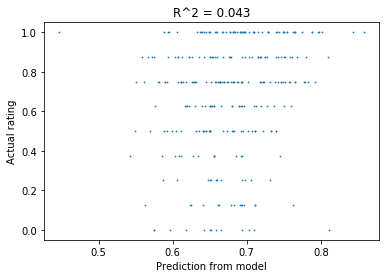

In [34]:
# Visualize: actual vs. predicted rating
plt.plot(yHat,alien_new.iloc[:,0],'o',markersize=.75) 
plt.xlabel('Prediction from model') 
plt.ylabel('Actual rating')  
plt.title('R^2 = {:.3f}'.format(rSqr))

A list of concluding functions prersented below:

In [35]:
# function of conducting linear regression model on the movie data with cross-validation
def movie_lr(a):
    table=pstable.drop(pstable.iloc[:,0:a], axis = 1)
    table=table.drop(table.iloc[:,1:400-a], axis = 1)
    table_new=table.dropna()
    #min_max = preprocessing.MinMaxScaler()
    #table2 = min_max.fit_transform(table_new.values)
    #table_final = pd.DataFrame(table2,columns=table.columns)
    X1 = table_new.iloc[:, 1:].values
    y1 = table_new.iloc[:, 0].values
    #define cross-validation method to use
    cv = KFold(n_splits=10, random_state=1, shuffle=True) 
    #build multiple linear regression model
    model = LinearRegression()
    #model = LinearRegression().fit(X1,y1)
    #use LOOCV to evaluate model
    scores = cross_val_score(model, X1, y1, scoring='neg_mean_squared_error',cv=cv, n_jobs=-1)
    #view RMSE
    return np.sqrt(np.mean(np.absolute(scores)))

In [33]:
# function of conducting lasso regression model on the movie data with cross-validation
from sklearn.linear_model import Lasso
def movie_lasso(a):
    table=pstable.drop(pstable.iloc[:,0:a], axis = 1)
    table=table.drop(table.iloc[:,1:400-a], axis = 1)
    table_new=table.dropna()
    #min_max = preprocessing.MinMaxScaler()
    #table2 = min_max.fit_transform(table_new.values)
    #table_final = pd.DataFrame(table2,columns=table.columns)
    X1 = table_new.iloc[:, 1:].values
    y1 = table_new.iloc[:, 0].values
    #define cross-validation method to use
    cv = KFold(n_splits=10, random_state=1, shuffle=True) 
    #build multiple linear regression model
    model = Lasso()
    #model = LinearRegression().fit(X1,y1)
    #use LOOCV to evaluate model
    scores = cross_val_score(model, X1, y1, scoring='neg_mean_squared_error',cv=cv, n_jobs=-1)
    #view RMSE
    return np.sqrt(np.mean(np.absolute(scores)))

In [32]:
# function of conducting ridge regression model on the movie data with cross-validation
from sklearn.linear_model import Ridge
def movie_ridge(a):
    table=pstable.drop(pstable.iloc[:,0:a], axis = 1)
    table=table.drop(table.iloc[:,1:400-a], axis = 1)
    table_new=table.dropna()
    #min_max = preprocessing.MinMaxScaler()
    #table2 = min_max.fit_transform(table_new.values)
    #table_final = pd.DataFrame(table2,columns=table.columns)
    X1 = table_new.iloc[:, 1:].values
    y1 = table_new.iloc[:, 0].values
    #define cross-validation method to use
    cv = KFold(n_splits=10, random_state=1, shuffle=True) 
    #build multiple linear regression model
    model = Ridge()
    #model = LinearRegression().fit(X1,y1)
    #use LOOCV to evaluate model
    scores = cross_val_score(model, X1, y1, scoring='neg_mean_squared_error',cv=cv, n_jobs=-1)
    #view RMSE
    return np.sqrt(np.mean(np.absolute(scores)))

In [38]:
# function of conducting random forest model on the movie data with cross-validation
def movie_rf(a):
    table=pstable.drop(pstable.iloc[:,0:a], axis = 1)
    table=table.drop(table.iloc[:,1:400-a], axis = 1)
    table_new=table.dropna()
    #min_max = preprocessing.MinMaxScaler()
    #table2 = min_max.fit_transform(table_new.values)
    #table_final = pd.DataFrame(table2,columns=table.columns)
    X1 = table_new.iloc[:, 1:].values
    y1 = table_new.iloc[:, 0].values
    #define cross-validation method to use
    cv = KFold(n_splits=10, random_state=1, shuffle=True) 
    #build multiple linear regression model
    model = RandomForestRegressor(n_estimators=100)
    #model = LinearRegression().fit(X1,y1)
    #use LOOCV to evaluate model
    scores = cross_val_score(model, X1, y1, scoring='neg_mean_squared_error',cv=cv, n_jobs=-1)
    #view RMSE
    return np.sqrt(np.mean(np.absolute(scores)))

In [39]:
# Method-1
 
# Import pandas module
import pandas as pd 
# create a table presenting RMSE for movie rating prediction across different regression models
# Create an empty DataFrame without 
# Any any row or column
# Using pd.DataFrame() function
df1 = pd.DataFrame(columns =pstable.iloc[:,0:400].columns,index=['LR RMSE','RF RMSE','Lasso RMSE','Ridge RMSE'])


In [40]:
# create a table presenting RMSE for movie rating prediction across different regression models
for i in range(400):
    df1.iloc[0,i]=movie_lr(i)
    df1.iloc[1,i]=movie_rf(i)
    df1.iloc[2,i]=movie_lasso(i)
    df1.iloc[3,i]=movie_ridge(i)
    

In [41]:
df1

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,X-Men 2 (2003),The Usual Suspects (1995),The Mask (1994),Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989)
LR RMSE,0.317488,0.289667,0.228554,0.292563,0.228142,0.255729,0.260611,0.267687,0.272434,0.240994,...,0.226086,0.256247,0.270176,0.264038,0.2173,0.298135,0.279196,0.252622,0.299872,0.307884
RF RMSE,0.314248,0.309317,0.235812,0.310883,0.23447,0.267614,0.274026,0.270277,0.277836,0.253456,...,0.236829,0.261535,0.278446,0.27871,0.22286,0.285749,0.287102,0.269289,0.311261,0.310317
Lasso RMSE,0.293973,0.288163,0.22939,0.288877,0.226892,0.255783,0.257529,0.265507,0.256412,0.242415,...,0.226897,0.25227,0.275804,0.263468,0.218809,0.287383,0.289126,0.252063,0.285113,0.287453
Ridge RMSE,0.317054,0.289403,0.228548,0.292545,0.228138,0.255663,0.260587,0.267669,0.272349,0.240991,...,0.226081,0.256223,0.270169,0.264035,0.217299,0.297684,0.279177,0.25259,0.299437,0.307712


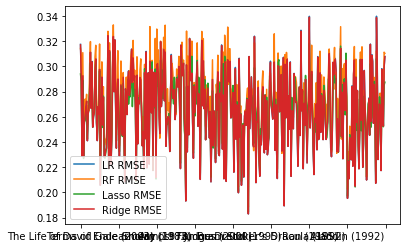

In [42]:
# RMSE flucuations across movies corresponding to each model
df1.T.plot()

In [43]:
# mean of RMSE for different models across movies
df1.mean(axis=1)

LR RMSE       0.265763
RF RMSE       0.272817
Lasso RMSE    0.264667
Ridge RMSE    0.265652
dtype: float64

In [44]:
# median of RMSE forr different models across movies
df1.median(axis=1)

LR RMSE       0.266991
RF RMSE       0.275258
Lasso RMSE    0.267848
Ridge RMSE    0.266886
dtype: float64

# 9. Build a prediction model of your choice (regression or supervised learning) to predict movie ratings (for all 400 movies) from gender identity, sibship status and social viewing preferences (columns 475-477) only. Make sure to use cross-validation methods to avoid overfitting and characterize the accuracy of your model.

In [2]:
data=pd.read_csv("/Users/beckybian/Desktop/NYUstudy/大三下/Intro to DS/Final project/movieReplicationSet - Copy.csv")

In [3]:
data9=data.iloc[:,0:477]

In [4]:
data9=data9.drop(data9.iloc[:,400:474], axis = 1)

In [5]:
data9

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989),Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,4.0,0.5,NaN,NaN,NaN,NaN,NaN,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.5,NaN,NaN,NaN,NaN,NaN,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,NaN,2.5,NaN,NaN,NaN,NaN,NaN,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,NaN,NaN,NaN,NaN,1.5,NaN,NaN,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,1.0,0,0
1093,3.0,4.0,NaN,NaN,4.0,4.0,2.5,NaN,3.5,3.5,...,3.5,3.5,4.0,3.5,4.0,4.0,4.0,1.0,0,0
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,1.0,0,0
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.5,NaN,NaN,NaN,NaN,NaN,1.0,0,1


In [62]:
sstable=pd.read_csv("/Users/beckybian/Desktop/NYUstudy/大三下/Intro to DS/Final project/sstable.csv")

In [64]:
data10=sstable.iloc[:,0:400]
for column in gos:
    data10[column]=gos[column]

/Users/beckybian/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [65]:
data10

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond),Gender identity (1 = female; 2 = male; 3 = self-described)
0,NaN,NaN,1.000,NaN,0.750,NaN,NaN,NaN,NaN,NaN,...,1.000,0.125,NaN,NaN,NaN,NaN,NaN,-0.445956,0.872196,-0.565067
1,NaN,NaN,0.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.000,NaN,NaN,NaN,NaN,NaN,-0.445956,-1.146531,-0.565067
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.875,NaN,NaN,NaN,NaN,NaN,2.242376,-1.146531,-0.565067
3,NaN,NaN,0.500,NaN,0.750,NaN,NaN,NaN,NaN,1.000,...,NaN,0.625,NaN,NaN,NaN,NaN,NaN,-0.445956,0.872196,-0.565067
4,NaN,NaN,0.875,NaN,0.125,NaN,0.125,0.250,NaN,0.000,...,NaN,NaN,NaN,NaN,0.375,NaN,NaN,2.242376,0.872196,-0.565067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,NaN,NaN,0.875,NaN,NaN,NaN,NaN,NaN,...,NaN,1.000,NaN,NaN,NaN,NaN,NaN,-0.445956,-1.146531,-0.565067
1093,0.75,1.0,NaN,NaN,1.000,1.0,0.625,NaN,0.875,0.875,...,0.875,0.875,1.0,0.875,1.000,1.0,1.0,-0.445956,-1.146531,-0.565067
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.875,NaN,NaN,...,NaN,1.000,NaN,NaN,NaN,NaN,NaN,-0.445956,-1.146531,-0.565067
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.625,NaN,NaN,NaN,NaN,NaN,-0.445956,0.872196,-0.565067


In [6]:
# delete those who didn't answer the questions of only child and social preference
data9=data9[data9["Are you an only child? (1: Yes; 0: No; -1: Did not respond)"]!=-1]

In [7]:
data9=data9[data9["Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)"]!=-1]

In [8]:
data9

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989),Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,4.0,0.5,NaN,NaN,NaN,NaN,NaN,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.5,NaN,NaN,NaN,NaN,NaN,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,NaN,2.5,NaN,NaN,NaN,NaN,NaN,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,NaN,NaN,NaN,NaN,1.5,NaN,NaN,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,1.0,0,0
1093,3.0,4.0,NaN,NaN,4.0,4.0,2.5,NaN,3.5,3.5,...,3.5,3.5,4.0,3.5,4.0,4.0,4.0,1.0,0,0
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,1.0,0,0
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.5,NaN,NaN,NaN,NaN,NaN,1.0,0,1


In [90]:
# normalize the dataset
min_max = preprocessing.MinMaxScaler()
data10 = min_max.fit_transform(data9.values)
data9=pd.DataFrame(data10,columns=data9.columns)

In [9]:
from scipy import stats
gos=stats.zscore(data9.iloc[:,-2:])

In [10]:
gos

,Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,-0.445956,0.872196
1,-0.445956,-1.146531
2,2.242376,-1.146531
3,-0.445956,0.872196
4,2.242376,0.872196
...,...,...
1092,-0.445956,-1.146531
1093,-0.445956,-1.146531
1094,-0.445956,-1.146531
1095,-0.445956,0.872196


In [11]:
data9['Are you an only child? (1: Yes; 0: No; -1: Did not respond)']=gos['Are you an only child? (1: Yes; 0: No; -1: Did not respond)']

In [12]:
data9['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)']=gos['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)']

In [16]:
data9['Gender identity (1 = female; 2 = male; 3 = self-described)']=gos['Gender identity (1 = female; 2 = male; 3 = self-described)']

In [15]:
gos['Gender identity (1 = female; 2 = male; 3 = self-described)']=(data9.iloc[:,-3]-np.mean(data9.iloc[:,-3]))/np.std(data9.iloc[:,-3])

In [17]:
data9["Gender identity (1 = female; 2 = male; 3 = self-described)"].value_counts()

-0.565067    801
 1.669995    257
 3.905057      6
Name: Gender identity (1 = female; 2 = male; 3 = self-described), dtype: int64

In [18]:
data9

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989),Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,4.0,0.5,NaN,NaN,NaN,NaN,NaN,-0.565067,-0.445956,0.872196
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,-0.565067,-0.445956,-1.146531
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.5,NaN,NaN,NaN,NaN,NaN,-0.565067,2.242376,-1.146531
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,NaN,2.5,NaN,NaN,NaN,NaN,NaN,-0.565067,-0.445956,0.872196
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,NaN,NaN,NaN,NaN,1.5,NaN,NaN,-0.565067,2.242376,0.872196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,-0.565067,-0.445956,-1.146531
1093,3.0,4.0,NaN,NaN,4.0,4.0,2.5,NaN,3.5,3.5,...,3.5,3.5,4.0,3.5,4.0,4.0,4.0,-0.565067,-0.445956,-1.146531
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,-0.565067,-0.445956,-1.146531
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.5,NaN,NaN,NaN,NaN,NaN,-0.565067,-0.445956,0.872196


In [59]:
data10=stats.zscore(data9.iloc[:,0:400])

In [60]:
data10

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,X-Men 2 (2003),The Usual Suspects (1995),The Mask (1994),Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
data10['The Life of David Gale (2003)'].value_counts()

Series([], Name: The Life of David Gale (2003), dtype: int64)

In [19]:
data9.isnull().sum()

The Life of David Gale (2003)                                          995
Wing Commander (1999)                                                  999
Django Unchained (2012)                                                630
Alien (1979)                                                           787
Indiana Jones and the Last Crusade (1989)                              621
                                                                      ... 
MacArthur (1977)                                                      1006
Look Who's Talking (1989)                                              961
Gender identity (1 = female; 2 = male; 3 = self-described)               3
Are you an only child? (1: Yes; 0: No; -1: Did not respond)              0
Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)       0
Length: 403, dtype: int64

In [66]:
data9=data10

In [67]:
alien=data9.drop(data9.iloc[:,0:3], axis = 1)

In [68]:
alien=alien.drop(alien.iloc[:,1:397], axis = 1)

In [69]:
alien

,Alien (1979),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond),Gender identity (1 = female; 2 = male; 3 = self-described)
0,NaN,-0.445956,0.872196,-0.565067
1,NaN,-0.445956,-1.146531,-0.565067
2,NaN,2.242376,-1.146531,-0.565067
3,NaN,-0.445956,0.872196,-0.565067
4,NaN,2.242376,0.872196,-0.565067
...,...,...,...,...
1092,NaN,-0.445956,-1.146531,-0.565067
1093,NaN,-0.445956,-1.146531,-0.565067
1094,NaN,-0.445956,-1.146531,-0.565067
1095,NaN,-0.445956,0.872196,-0.565067


In [70]:
alien.isnull().sum()

Alien (1979)                                                          808
Are you an only child? (1: Yes; 0: No; -1: Did not respond)            30
Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)     30
Gender identity (1 = female; 2 = male; 3 = self-described)             33
dtype: int64

In [71]:
alien_final=alien.dropna()

In [72]:
alien_final.isnull().sum()

Alien (1979)                                                          0
Are you an only child? (1: Yes; 0: No; -1: Did not respond)           0
Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)    0
Gender identity (1 = female; 2 = male; 3 = self-described)            0
dtype: int64

In [73]:
# first trial: without considering about the correlation, we use linear regression and cross-validation directly
# Second trial: linear regression after normalization
X1 = alien_final.iloc[:, 1:].values
y1 = alien_final.iloc[:, 0].values

In [74]:
#define cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True) 

#build multiple linear regression model
model = LinearRegression()
#model = LinearRegression().fit(X1,y1)

#use LOOCV to evaluate model
scores = cross_val_score(model, X1, y1, scoring='neg_mean_squared_error',cv=cv, n_jobs=-1)

#view RMSE
np.sqrt(np.mean(np.absolute(scores)))

# a relatively RMSE, probably because we didn't normalize the data, let's try to normalize it

0.2827630685480894

In [75]:
from sklearn.ensemble import RandomForestRegressor
#define cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True) 

#build random forest model
model = RandomForestRegressor(n_estimators=100)

#use LOOCV to evaluate model
scores = cross_val_score(model, X1, y1, scoring='neg_mean_squared_error',cv=cv, n_jobs=-1)

#view RMSE
np.sqrt(np.mean(np.absolute(scores)))

# a relatively RMSE, probably because we didn't normalize the data, let's try to normalize it

0.28749297893687664

In [76]:
cv = KFold(n_splits=10, random_state=1, shuffle=True) 
#build multiple linear regression model
model = Lasso()
#model = LinearRegression().fit(X1,y1)
#use LOOCV to evaluate model
scores = cross_val_score(model, X1, y1, scoring='neg_mean_squared_error',cv=cv, n_jobs=-1)
np.sqrt(np.mean(np.absolute(scores)))

0.28918202539331234

In [77]:
cv = KFold(n_splits=10, random_state=1, shuffle=True) 
#build multiple linear regression model
model = Ridge()
#model = LinearRegression().fit(X1,y1)
#use LOOCV to evaluate model
scores = cross_val_score(model, X1, y1, scoring='neg_mean_squared_error',cv=cv, n_jobs=-1)
np.sqrt(np.mean(np.absolute(scores)))

0.28274988228032333

In [78]:
# draw the final regression and plot it
# Model: All factors
model = LinearRegression().fit(X1,y1)
rSqr = model.score(X1,y1)
print(rSqr)
b0, b1 = model.intercept_, model.coef_

0.0698382612477878


In [79]:
yHat=b0
for i in range(3):
    yHat+=b1[i]*alien_final.iloc[:,1+i]

In [80]:
model.intercept_

0.6546321551312656

In [81]:
model.coef_

array([-0.01877799,  0.0187644 ,  0.06174653])

Text(0.5, 1.0, 'R^2 = 0.070')

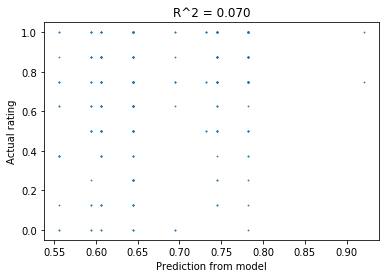

In [82]:
# Visualize: actual vs. predicted rating
plt.plot(yHat,alien_final.iloc[:,0],'o',markersize=.75) 
plt.xlabel('Prediction from model') 
plt.ylabel('Actual rating')  
plt.title('R^2 = {:.3f}'.format(rSqr))

A list of concluding functions below:

In [83]:
# function of conducting linear regression model on the movie data with cross-validation
def movie_lr(a):
    table=data9.drop(data9.iloc[:,0:a], axis = 1)
    table=table.drop(table.iloc[:,1:400-a], axis = 1)
    table_new=table.dropna()
    #min_max = preprocessing.MinMaxScaler()
    #table2 = min_max.fit_transform(table_new.values)
    #table_final = pd.DataFrame(table2,columns=table.columns)
    X1 = table_new.iloc[:, 1:].values
    y1 = table_new.iloc[:, 0].values
    #define cross-validation method to use
    cv = KFold(n_splits=10, random_state=1, shuffle=True) 
    #build multiple linear regression model
    model = LinearRegression()
    #model = LinearRegression().fit(X1,y1)
    #use LOOCV to evaluate model
    scores = cross_val_score(model, X1, y1, scoring='neg_mean_squared_error',cv=cv, n_jobs=-1)
    #view RMSE
    return np.sqrt(np.mean(np.absolute(scores)))
    # a relatively RMSE, probably because we didn't normalize the data, let's try to normalize it

In [84]:
# function of conducting lasso regression model on the movie data with cross-validation
def movie_lasso(a):
    table=data9.drop(data9.iloc[:,0:a], axis = 1)
    table=table.drop(table.iloc[:,1:400-a], axis = 1)
    table_new=table.dropna()
    #min_max = preprocessing.MinMaxScaler()
    #table2 = min_max.fit_transform(table_new.values)
    #table_final = pd.DataFrame(table2,columns=table.columns)
    X1 = table_new.iloc[:, 1:].values
    y1 = table_new.iloc[:, 0].values
    #define cross-validation method to use
    cv = KFold(n_splits=10, random_state=1, shuffle=True) 
    #build multiple linear regression model
    model = Lasso()
    #model = LinearRegression().fit(X1,y1)
    #use LOOCV to evaluate model
    scores = cross_val_score(model, X1, y1, scoring='neg_mean_squared_error',cv=cv, n_jobs=-1)
    #view RMSE
    return np.sqrt(np.mean(np.absolute(scores)))
    # a relatively RMSE, probably because we didn't normalize the data, let's try to normalize it

In [85]:
# function of conducting ridge regression model on the movie data with cross-validation
def movie_ridge(a):
    table=data9.drop(data9.iloc[:,0:a], axis = 1)
    table=table.drop(table.iloc[:,1:400-a], axis = 1)
    table_new=table.dropna()
    #min_max = preprocessing.MinMaxScaler()
    #table2 = min_max.fit_transform(table_new.values)
    #table_final = pd.DataFrame(table2,columns=table.columns)
    X1 = table_new.iloc[:, 1:].values
    y1 = table_new.iloc[:, 0].values
    #define cross-validation method to use
    cv = KFold(n_splits=10, random_state=1, shuffle=True) 
    #build multiple linear regression model
    model = Ridge()
    #model = LinearRegression().fit(X1,y1)
    #use LOOCV to evaluate model
    scores = cross_val_score(model, X1, y1, scoring='neg_mean_squared_error',cv=cv, n_jobs=-1)
    #view RMSE
    return np.sqrt(np.mean(np.absolute(scores)))
    # a relatively RMSE, probably because we didn't normalize the data, let's try to normalize it

In [86]:
# function of conducting random forest model on the movie data with cross-validation
def movie_rf(a):
    table=data9.drop(data9.iloc[:,0:a], axis = 1)
    table=table.drop(table.iloc[:,1:400-a], axis = 1)
    table_new=table.dropna()
    #min_max = preprocessing.MinMaxScaler()
    #table2 = min_max.fit_transform(table_new.values)
    #table_final = pd.DataFrame(table2,columns=table.columns)
    X1 = table_new.iloc[:, 1:].values
    y1 = table_new.iloc[:, 0].values
    #define cross-validation method to use
    cv = KFold(n_splits=10, random_state=1, shuffle=True) 
    #build multiple linear regression model
    model = RandomForestRegressor(n_estimators=100)
    #model = LinearRegression().fit(X1,y1)
    #use LOOCV to evaluate model
    scores = cross_val_score(model, X1, y1, scoring='neg_mean_squared_error',cv=cv, n_jobs=-1)
    #view RMSE
    return np.sqrt(np.mean(np.absolute(scores)))
    # a relatively RMSE, probably because we didn't normalize the data, let's try to normalize it

In [87]:
# Method-1
 
# Import pandas module
import pandas as pd 
# create a table presenting RMSE for movie rating prediction across different regression models
# Create an empty DataFrame without 
# Any any row or column
# Using pd.DataFrame() function
df2 = pd.DataFrame(columns =data9.iloc[:,0:400].columns,index=['LR RMSE','RF RMSE','Lasso RMSE','Ridge RMSE'])

In [88]:
for i in range(400):
    df2.iloc[0,i]=movie_lr(i)
    df2.iloc[1,i]=movie_rf(i)
    df2.iloc[2,i]=movie_lasso(i)
    df2.iloc[3,i]=movie_ridge(i)
    

In [89]:
df2

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,X-Men 2 (2003),The Usual Suspects (1995),The Mask (1994),Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989)
LR RMSE,0.295563,0.284317,0.227905,0.282763,0.225019,0.256321,0.256721,0.266923,0.267237,0.242474,...,0.230008,0.258374,0.278207,0.262746,0.216278,0.302822,0.292468,0.257001,0.300372,0.275215
RF RMSE,0.29003,0.29939,0.229415,0.287931,0.225054,0.258506,0.267436,0.268457,0.270709,0.24393,...,0.234478,0.26345,0.2765,0.26551,0.217359,0.301124,0.299516,0.257284,0.319095,0.268299
Lasso RMSE,0.298381,0.285886,0.229977,0.289182,0.224999,0.251835,0.257583,0.266109,0.26042,0.242143,...,0.228072,0.252486,0.277022,0.264576,0.218567,0.287383,0.288974,0.25158,0.285113,0.285275
Ridge RMSE,0.295471,0.284103,0.2279,0.28275,0.225014,0.256242,0.256703,0.266899,0.267169,0.242472,...,0.230003,0.258331,0.278198,0.262741,0.216277,0.302518,0.292447,0.256959,0.300054,0.275092


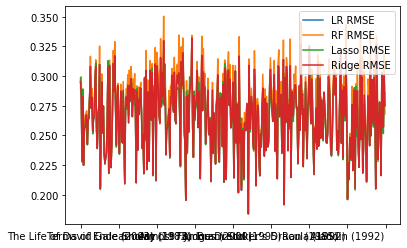

In [90]:
# RMSE flucuations across movies corresponding to each model
df2.T.plot()

In [91]:
d=df2.T

In [92]:
np.mean(d['LR RMSE'])

0.2670897137437189

In [93]:
np.mean(d['RF RMSE'])

0.27231326671152994

In [94]:
# mean of RMSE for different models across movies
df2.mean(axis=1)

LR RMSE       0.267090
RF RMSE       0.272313
Lasso RMSE    0.265257
Ridge RMSE    0.267015
dtype: float64

In [95]:
# median of RMSE for different models across movies
df2.median(axis=1)

LR RMSE       0.270090
RF RMSE       0.274592
Lasso RMSE    0.269410
Ridge RMSE    0.270083
dtype: float64

# 10. Build a prediction model of your choice (regression or supervised learning) to predict movie ratings (for all 400 movies) from all available factors that are not movie ratings (columns 401-477). Make sure to use cross-validation methods to avoid overfitting and characterize the accuracy of your model.

In [4]:
sstable=pd.read_csv("/Users/beckybian/Desktop/NYUstudy/大三下/Intro to DS/Final project/sstable.csv")

In [5]:
pstable=pd.read_csv("/Users/beckybian/Desktop/NYUstudy/大三下/Intro to DS/Final project/pstable.csv")

In [6]:
metable=pd.read_csv("/Users/beckybian/Desktop/NYUstudy/大三下/Intro to DS/Final project/metable.csv")

In [9]:
data.iloc[:,474:]

,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,1.0,0,1
1,1.0,0,0
2,1.0,1,0
3,1.0,0,1
4,1.0,1,1
...,...,...,...
1092,1.0,0,0
1093,1.0,0,0
1094,1.0,0,0
1095,1.0,0,1


In [10]:
newtable=pd.concat([sstable,pstable.iloc[:,400:],metable.iloc[:,400:],data.iloc[:,474:]],axis=1)

In [11]:
data10=newtable[newtable["Are you an only child? (1: Yes; 0: No; -1: Did not respond)"]!=-1]

In [12]:
data10=data10[data10["Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)"]!=-1]

In [13]:
data10

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,PSPC3,PSPC4,PSPC5,PSPC6,PSPC7,MEPC1,MEPC2,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,1.000,NaN,0.750,NaN,NaN,NaN,NaN,NaN,...,-1.828417,0.870151,5.367108,-1.419090,2.538357,0.694189,-0.860263,1.0,0,1
1,NaN,NaN,0.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.450606,1.157547,1.412102,-1.402022,1.777282,-0.114457,-1.382804,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.476806,1.305224,-1.319550,0.165010,0.366985,1.758604,-0.610753,1.0,1,0
3,NaN,NaN,0.500,NaN,0.750,NaN,NaN,NaN,NaN,1.000,...,-0.393521,0.132534,-1.760632,2.787845,0.412446,-1.660701,-1.833419,1.0,0,1
4,NaN,NaN,0.875,NaN,0.125,NaN,0.125,0.250,NaN,0.000,...,1.827915,0.077354,-1.516327,0.209556,0.504654,1.380539,0.022313,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,NaN,NaN,0.875,NaN,NaN,NaN,NaN,NaN,...,-1.160415,-0.795910,-1.152528,0.957226,1.415285,2.079284,0.475004,1.0,0,0
1093,0.75,1.0,NaN,NaN,1.000,1.0,0.625,NaN,0.875,0.875,...,1.769161,0.034544,-0.019625,-5.538726,0.844476,3.742170,2.086046,1.0,0,0
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.875,NaN,NaN,...,-3.074183,-1.457141,-1.382879,0.668877,1.274236,1.413124,-1.422399,1.0,0,0
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.978901,2.282479,0.202917,-1.558947,0.255646,-1.347086,1.168299,1.0,0,1


In [14]:
data10.iloc[:,-3:]

,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,1.0,0,1
1,1.0,0,0
2,1.0,1,0
3,1.0,0,1
4,1.0,1,1
...,...,...,...
1092,1.0,0,0
1093,1.0,0,0
1094,1.0,0,0
1095,1.0,0,1


In [17]:
# normalize the dataset
min_max = preprocessing.MinMaxScaler()
gos = min_max.fit_transform(data10.iloc[:,-3:].values)
gos=pd.DataFrame(gos,columns=data10.iloc[:,-3:].columns)

In [18]:
gos=stats.zscore(data10.iloc[:,-2:])

In [19]:
gos

,Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,-0.445956,0.872196
1,-0.445956,-1.146531
2,2.242376,-1.146531
3,-0.445956,0.872196
4,2.242376,0.872196
...,...,...
1092,-0.445956,-1.146531
1093,-0.445956,-1.146531
1094,-0.445956,-1.146531
1095,-0.445956,0.872196


In [20]:
gos['Gender identity (1 = female; 2 = male; 3 = self-described)']=(data10.iloc[:,-3]-np.mean(data10.iloc[:,-3]))/np.std(data10.iloc[:,-3])

In [21]:
gos

,Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond),Gender identity (1 = female; 2 = male; 3 = self-described)
0,-0.445956,0.872196,-0.565067
1,-0.445956,-1.146531,-0.565067
2,2.242376,-1.146531,-0.565067
3,-0.445956,0.872196,-0.565067
4,2.242376,0.872196,-0.565067
...,...,...,...
1092,-0.445956,-1.146531,-0.565067
1093,-0.445956,-1.146531,-0.565067
1094,-0.445956,-1.146531,-0.565067
1095,-0.445956,0.872196,-0.565067


In [22]:
for column in gos:
    data10[column]=gos[column]

In [23]:
data10

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,PSPC3,PSPC4,PSPC5,PSPC6,PSPC7,MEPC1,MEPC2,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,1.000,NaN,0.750,NaN,NaN,NaN,NaN,NaN,...,-1.828417,0.870151,5.367108,-1.419090,2.538357,0.694189,-0.860263,-0.565067,-0.445956,0.872196
1,NaN,NaN,0.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.450606,1.157547,1.412102,-1.402022,1.777282,-0.114457,-1.382804,-0.565067,-0.445956,-1.146531
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.476806,1.305224,-1.319550,0.165010,0.366985,1.758604,-0.610753,-0.565067,2.242376,-1.146531
3,NaN,NaN,0.500,NaN,0.750,NaN,NaN,NaN,NaN,1.000,...,-0.393521,0.132534,-1.760632,2.787845,0.412446,-1.660701,-1.833419,-0.565067,-0.445956,0.872196
4,NaN,NaN,0.875,NaN,0.125,NaN,0.125,0.250,NaN,0.000,...,1.827915,0.077354,-1.516327,0.209556,0.504654,1.380539,0.022313,-0.565067,2.242376,0.872196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,NaN,NaN,0.875,NaN,NaN,NaN,NaN,NaN,...,-1.160415,-0.795910,-1.152528,0.957226,1.415285,2.079284,0.475004,-0.565067,-0.445956,-1.146531
1093,0.75,1.0,NaN,NaN,1.000,1.0,0.625,NaN,0.875,0.875,...,1.769161,0.034544,-0.019625,-5.538726,0.844476,3.742170,2.086046,-0.565067,-0.445956,-1.146531
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.875,NaN,NaN,...,-3.074183,-1.457141,-1.382879,0.668877,1.274236,1.413124,-1.422399,-0.565067,-0.445956,-1.146531
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.978901,2.282479,0.202917,-1.558947,0.255646,-1.347086,1.168299,-0.565067,-0.445956,0.872196


In [24]:
data10["Gender identity (1 = female; 2 = male; 3 = self-described)"].value_counts()

-0.565067    801
 1.669995    257
 3.905057      6
Name: Gender identity (1 = female; 2 = male; 3 = self-described), dtype: int64

In [25]:
alien=data10.drop(data10.iloc[:,0:3], axis = 1)

In [26]:
alien=alien.drop(alien.iloc[:,1:397], axis = 1)

In [27]:
alien

,Alien (1979),SSPC1,SSPC2,SSPC3,SSPC4,SSPC5,SSPC6,PSPC1,PSPC2,PSPC3,PSPC4,PSPC5,PSPC6,PSPC7,MEPC1,MEPC2,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,-0.401368,0.135813,-0.221522,0.195467,-2.009351,-1.069057,2.208913,0.297061,-1.828417,0.870151,5.367108,-1.419090,2.538357,0.694189,-0.860263,-0.565067,-0.445956,0.872196
1,NaN,-1.266145,-0.116168,-0.273053,-0.397357,0.393601,0.677003,2.011374,1.051272,-2.450606,1.157547,1.412102,-1.402022,1.777282,-0.114457,-1.382804,-0.565067,-0.445956,-1.146531
2,NaN,-1.860053,1.107324,-0.836737,-0.940376,0.529386,0.101831,0.213790,0.177162,0.476806,1.305224,-1.319550,0.165010,0.366985,1.758604,-0.610753,-0.565067,2.242376,-1.146531
3,NaN,0.271827,-1.281833,0.689046,-1.695750,0.578851,-1.519591,-1.701968,-2.852014,-0.393521,0.132534,-1.760632,2.787845,0.412446,-1.660701,-1.833419,-0.565067,-0.445956,0.872196
4,NaN,0.491141,0.898617,-1.125942,2.081612,-1.448158,0.238443,2.206418,-0.128517,1.827915,0.077354,-1.516327,0.209556,0.504654,1.380539,0.022313,-0.565067,2.242376,0.872196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,-1.151205,0.934886,-0.726252,-1.779756,1.077602,-1.137699,0.187947,-1.616939,-1.160415,-0.795910,-1.152528,0.957226,1.415285,2.079284,0.475004,-0.565067,-0.445956,-1.146531
1093,NaN,1.319284,-0.449772,0.375921,-2.607831,1.927381,0.386484,-1.749835,-2.650070,1.769161,0.034544,-0.019625,-5.538726,0.844476,3.742170,2.086046,-0.565067,-0.445956,-1.146531
1094,NaN,-1.122813,2.239533,-0.443013,-1.770376,-0.826526,0.760211,-2.192696,-1.519139,-3.074183,-1.457141,-1.382879,0.668877,1.274236,1.413124,-1.422399,-0.565067,-0.445956,-1.146531
1095,NaN,-1.800003,-0.730718,-0.552853,0.907252,-1.397067,-0.707624,-0.939143,-3.561183,-0.978901,2.282479,0.202917,-1.558947,0.255646,-1.347086,1.168299,-0.565067,-0.445956,0.872196


In [28]:
alien.isnull().sum()

Alien (1979)                                                          787
SSPC1                                                                   0
SSPC2                                                                   0
SSPC3                                                                   0
SSPC4                                                                   0
SSPC5                                                                   0
SSPC6                                                                   0
PSPC1                                                                   0
PSPC2                                                                   0
PSPC3                                                                   0
PSPC4                                                                   0
PSPC5                                                                   0
PSPC6                                                                   0
PSPC7                                 

In [29]:
alien_new=alien.dropna()

In [34]:
alien_new

,Alien (1979),SSPC1,SSPC2,SSPC3,SSPC4,SSPC5,SSPC6,PSPC1,PSPC2,PSPC3,PSPC4,PSPC5,PSPC6,PSPC7,MEPC1,MEPC2,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
5,0.625,-0.897098,1.098268,-1.941131,0.202675,-0.042423,-1.052727,6.612358,0.270231,-1.556534,1.558881,0.847418,1.594202,2.096101,-0.907097,-2.026205,-0.565067,2.242376,-1.146531
7,0.625,3.241646,-1.732879,0.360704,-1.682203,0.787262,1.217398,2.079572,-0.484846,1.881905,0.911348,0.268381,-0.082841,0.850226,1.847782,0.023341,-0.565067,-0.445956,0.872196
11,0.000,3.762981,-2.152023,0.533257,0.640622,-1.288497,0.662386,-0.178860,-2.067199,0.289390,3.220487,0.491259,-2.644172,1.659871,2.080385,-3.479034,-0.565067,-0.445956,0.872196
22,0.750,3.394470,1.600149,-2.066313,0.715797,-0.828799,-2.237418,2.747157,0.513846,1.368049,-1.514190,1.026301,-0.448838,-1.351362,3.032218,2.432917,1.669995,2.242376,-1.146531
24,0.250,-2.171145,-0.839646,-0.233111,-0.397784,-1.373671,-0.441870,3.339108,1.019018,-1.302036,1.198175,-0.666259,-1.140393,-0.881213,-4.801430,1.374200,1.669995,-0.445956,0.872196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1078,0.750,0.850030,0.745982,1.614886,0.449121,1.388764,-0.046752,1.205302,-0.989109,-1.067884,0.456710,1.230015,0.879927,-0.768297,-0.610073,0.645226,1.669995,-0.445956,0.872196
1084,1.000,-1.613712,-0.834380,2.208411,-0.737715,-3.182725,0.301610,-4.993387,-2.255509,0.202449,-3.672309,3.443546,0.194869,0.411560,-4.099150,-0.749542,1.669995,-0.445956,0.872196
1085,0.875,1.312784,0.517866,0.591309,-0.477486,0.343955,0.117910,3.058707,-1.813413,2.006175,-0.914414,-3.232505,-0.927467,-2.398193,-0.154145,1.026922,-0.565067,-0.445956,-1.146531
1086,0.625,4.009278,-0.670467,-1.665802,-0.276833,-0.211075,-0.184701,-1.966435,-0.416310,2.143506,0.767475,-2.508284,-1.184787,-2.489542,-0.482292,-2.194273,-0.565067,-0.445956,0.872196


In [30]:
# Second trial: linear regression after normalization
# first trial: without considering about the correlation, we use linear regression and cross-validation directly
X1 = alien_new.iloc[:, 1:].values
y1 = alien_new.iloc[:, 0].values

In [142]:
X1

array([[-0.89709814,  1.09826797, -1.94113087, ..., -0.56506745,
         2.24237566, -1.14653113],
       [ 3.24164575, -1.7328787 ,  0.36070396, ..., -0.56506745,
        -0.44595561,  0.87219612],
       [ 3.76298098, -2.15202329,  0.53325676, ..., -0.56506745,
        -0.44595561,  0.87219612],
       ...,
       [ 1.31278412,  0.51786591,  0.59130931, ..., -0.56506745,
        -0.44595561, -1.14653113],
       [ 4.00927819, -0.67046688, -1.66580194, ..., -0.56506745,
        -0.44595561,  0.87219612],
       [-0.37749961,  1.68083973,  1.45439386, ...,  1.66999487,
        -0.44595561,  0.87219612]])

In [31]:
#define cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True) 

#build multiple linear regression model
model = LinearRegression()
#model = LinearRegression().fit(X1,y1)

#use LOOCV to evaluate model
scores = cross_val_score(model, X1, y1, scoring='neg_mean_squared_error',cv=cv, n_jobs=-1)

#view RMSE
np.sqrt(np.mean(np.absolute(scores)))

# a relatively RMSE, probably because we didn't normalize the data, let's try to normalize it

0.28656006053519806

In [32]:
from sklearn.ensemble import RandomForestRegressor
#define cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True) 

#build random forest model
model = RandomForestRegressor(n_estimators=100)

#use LOOCV to evaluate model
scores = cross_val_score(model, X1, y1, scoring='neg_mean_squared_error',cv=cv, n_jobs=-1)

#view RMSE
np.sqrt(np.mean(np.absolute(scores)))

# a relatively RMSE, probably because we didn't normalize the data, let's try to normalize it

0.2879538975078252

In [35]:
cv = KFold(n_splits=10, random_state=1, shuffle=True) 
#build multiple linear regression model
model = Lasso()
#model = LinearRegression().fit(X1,y1)
#use LOOCV to evaluate model
scores = cross_val_score(model, X1, y1, scoring='neg_mean_squared_error',cv=cv, n_jobs=-1)
np.sqrt(np.mean(np.absolute(scores)))

0.28918202539331234

In [36]:
cv = KFold(n_splits=10, random_state=1, shuffle=True) 
#build multiple linear regression model
model = Ridge()
#model = LinearRegression().fit(X1,y1)
#use LOOCV to evaluate model
scores = cross_val_score(model, X1, y1, scoring='neg_mean_squared_error',cv=cv, n_jobs=-1)
np.sqrt(np.mean(np.absolute(scores)))

0.2864930392037451

In [53]:
# draw the final regression and plot it
# Model: All factors
model = LinearRegression().fit(X1,y1)
rSqr = model.score(X1,y1)
print(rSqr)
b0, b1 = model.intercept_, model.coef_

0.15823740261679553


In [54]:
b1

array([ 0.00166008,  0.02151489,  0.04442872,  0.00686779,  0.01006166,
        0.00407759, -0.00297406, -0.01552288, -0.00558722,  0.00326249,
        0.01612247,  0.01081153,  0.01774297,  0.0162006 ,  0.00341365,
        0.06258886, -0.02443192,  0.00793978])

In [55]:
yHat=b0
for i in range(18):
    yHat+=b1[i]*alien_new.iloc[:,1+i]

In [56]:
model.intercept_

0.6332014922072529

In [57]:
model.coef_

array([ 0.00166008,  0.02151489,  0.04442872,  0.00686779,  0.01006166,
        0.00407759, -0.00297406, -0.01552288, -0.00558722,  0.00326249,
        0.01612247,  0.01081153,  0.01774297,  0.0162006 ,  0.00341365,
        0.06258886, -0.02443192,  0.00793978])

Text(0.5, 1.0, 'R^2 = 0.158')

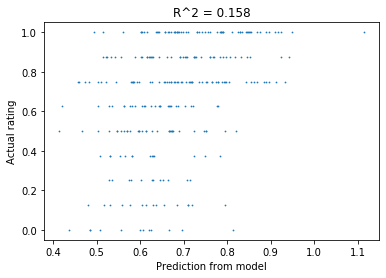

In [58]:
# Visualize: actual vs. predicted rating
plt.plot(yHat,alien_new.iloc[:,0],'o',markersize=.75) 
plt.xlabel('Prediction from model') 
plt.ylabel('Actual rating')  
plt.title('R^2 = {:.3f}'.format(rSqr))

A list of concluding functions below:

In [39]:
# function of conducting linear regression model on the movie data with cross-validation
def movie_lr(a):
    table=data10.drop(data10.iloc[:,0:a], axis = 1)
    table=table.drop(table.iloc[:,1:400-a], axis = 1)
    table_new=table.dropna()
    #min_max = preprocessing.MinMaxScaler()
    #table2 = min_max.fit_transform(table_new.values)
    #table_final = pd.DataFrame(table2,columns=table.columns)
    X1 = table_new.iloc[:, 1:].values
    y1 = table_new.iloc[:, 0].values
    #define cross-validation method to use
    cv = KFold(n_splits=10, random_state=1, shuffle=True) 
    #build multiple linear regression model
    model = LinearRegression()
    #model = LinearRegression().fit(X1,y1)
    #use LOOCV to evaluate model
    scores = cross_val_score(model, X1, y1, scoring='neg_mean_squared_error',cv=cv, n_jobs=-1)
    #view RMSE
    return np.sqrt(np.mean(np.absolute(scores)))
    # a relatively RMSE, probably because we didn't normalize the data, let's try to normalize it

In [40]:
# function of conducting random forest model on the movie data with cross-validation
def movie_rf(a):
    table=data10.drop(data10.iloc[:,0:a], axis = 1)
    table=table.drop(table.iloc[:,1:400-a], axis = 1)
    table_new=table.dropna()
    #min_max = preprocessing.MinMaxScaler()
    #table2 = min_max.fit_transform(table_new.values)
    #table_final = pd.DataFrame(table2,columns=table.columns)
    X1 = table_new.iloc[:, 1:].values
    y1 = table_new.iloc[:, 0].values
    #define cross-validation method to use
    cv = KFold(n_splits=10, random_state=1, shuffle=True) 
    #build multiple linear regression model
    model = RandomForestRegressor(n_estimators=100)
    #model = LinearRegression().fit(X1,y1)
    #use LOOCV to evaluate model
    scores = cross_val_score(model, X1, y1, scoring='neg_mean_squared_error',cv=cv, n_jobs=-1)
    #view RMSE
    return np.sqrt(np.mean(np.absolute(scores)))
    # a relatively RMSE, probably because we didn't normalize the data, let's try to normalize it

In [41]:
# function of conducting lasso regression model on the movie data with cross-validation
def movie_lasso(a):
    table=data10.drop(data10.iloc[:,0:a], axis = 1)
    table=table.drop(table.iloc[:,1:400-a], axis = 1)
    table_new=table.dropna()
    #min_max = preprocessing.MinMaxScaler()
    #table2 = min_max.fit_transform(table_new.values)
    #table_final = pd.DataFrame(table2,columns=table.columns)
    X1 = table_new.iloc[:, 1:].values
    y1 = table_new.iloc[:, 0].values
    #define cross-validation method to use
    cv = KFold(n_splits=10, random_state=1, shuffle=True) 
    #build multiple linear regression model
    model = Lasso()
    #model = LinearRegression().fit(X1,y1)
    #use LOOCV to evaluate model
    scores = cross_val_score(model, X1, y1, scoring='neg_mean_squared_error',cv=cv, n_jobs=-1)
    #view RMSE
    return np.sqrt(np.mean(np.absolute(scores)))
    # a relatively RMSE, probably because we didn't normalize the data, let's try to normalize it

In [42]:
# function of conducting ridge regression model on the movie data with cross-validation
def movie_ridge(a):
    table=data10.drop(data10.iloc[:,0:a], axis = 1)
    table=table.drop(table.iloc[:,1:400-a], axis = 1)
    table_new=table.dropna()
    #min_max = preprocessing.MinMaxScaler()
    #table2 = min_max.fit_transform(table_new.values)
    #table_final = pd.DataFrame(table2,columns=table.columns)
    X1 = table_new.iloc[:, 1:].values
    y1 = table_new.iloc[:, 0].values
    #define cross-validation method to use
    cv = KFold(n_splits=10, random_state=1, shuffle=True) 
    #build multiple linear regression model
    model = Ridge()
    #model = LinearRegression().fit(X1,y1)
    #use LOOCV to evaluate model
    scores = cross_val_score(model, X1, y1, scoring='neg_mean_squared_error',cv=cv, n_jobs=-1)
    #view RMSE
    return np.sqrt(np.mean(np.absolute(scores)))
    # a relatively RMSE, probably because we didn't normalize the data, let's try to normalize it

In [43]:
# Method-1
 
# Import pandas module
import pandas as pd 
# create a table presenting RMSE for movie rating prediction across different regression models
# Create an empty DataFrame without 
# Any any row or column
# Using pd.DataFrame() function
df3 = pd.DataFrame(columns =data10.iloc[:,0:400].columns,index=['LR RMSE','RF RMSE','Lasso RMSE','Ridge RMSE'])

In [44]:
for i in range(400):
    df3.iloc[0,i]=movie_lr(i)
    df3.iloc[1,i]=movie_rf(i)
    df3.iloc[2,i]=movie_lasso(i)
    df3.iloc[3,i]=movie_ridge(i)
    

In [45]:
df3

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,X-Men 2 (2003),The Usual Suspects (1995),The Mask (1994),Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989)
LR RMSE,0.344967,0.303254,0.229767,0.28656,0.227903,0.253586,0.269613,0.274336,0.28757,0.242251,...,0.230405,0.266764,0.275198,0.260375,0.214903,0.331468,0.297094,0.267451,0.329445,0.313321
RF RMSE,0.317246,0.272205,0.236064,0.289088,0.234097,0.252315,0.270197,0.268777,0.269521,0.248326,...,0.231695,0.263941,0.273558,0.263492,0.219778,0.289741,0.292535,0.264145,0.28806,0.300426
Lasso RMSE,0.298381,0.285886,0.229977,0.289182,0.224999,0.251835,0.257583,0.266109,0.26042,0.242143,...,0.228072,0.252486,0.277022,0.264576,0.218567,0.287383,0.288974,0.25158,0.285113,0.285275
Ridge RMSE,0.342854,0.301356,0.229747,0.286493,0.227883,0.253245,0.269459,0.27425,0.287235,0.242239,...,0.23038,0.266607,0.275168,0.260354,0.214898,0.328431,0.296936,0.267292,0.325145,0.312714


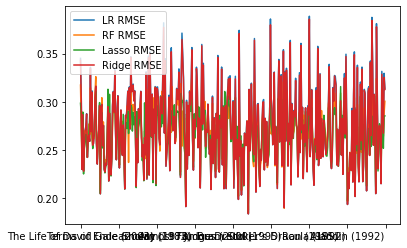

In [46]:
# RMSE flucuations across movies corresponding to each model
df3.T.plot()

In [47]:
#mean of RMSE across models
df3.mean(axis=1)

LR RMSE       0.275931
RF RMSE       0.268038
Lasso RMSE    0.265257
Ridge RMSE    0.275310
dtype: float64

In [48]:
#median of RMSE across models
df3.median(axis=1)

LR RMSE       0.272762
RF RMSE       0.269601
Lasso RMSE    0.269410
Ridge RMSE    0.272634
dtype: float64